# Naive Seasonal Analysis


## Data Cleaning
* Brand: Green Hero
* Type: Bestellung
* Marketplace: Amazon.de

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# importing csv files

df_2022_23 = pd.read_csv('/Users/judithrethmann/Documents/neuefische/Capstone/Part_2/data/raw/transactions_20220321_20230321.csv', usecols=['Datum/Uhrzeit', 'Typ', 'Bestellnummer', 'SKU', 'Beschreibung', 'Menge', 'Marketplace'])
df_2021_22 = pd.read_csv('/Users/judithrethmann/Documents/neuefische/Capstone/Part_2/data/raw/transactions_20210321_20220320.csv', usecols=['Datum/Uhrzeit', 'Typ', 'Bestellnummer', 'SKU', 'Beschreibung', 'Menge', 'Marketplace'])
df_2020_21 = pd.read_csv('/Users/judithrethmann/Documents/neuefische/Capstone/Part_2/data/raw/transactions_20200321_20210320.csv', usecols=['Datum/Uhrzeit', 'Typ', 'Bestellnummer', 'SKU', 'Beschreibung', 'Menge', 'Marketplace'])
df_2019_20 = pd.read_csv('/Users/judithrethmann/Documents/neuefische/Capstone/Part_2/data/raw/transactions_20190321_20200320.csv', usecols=['Datum/Uhrzeit', 'Typ', 'Bestellnummer', 'SKU', 'Beschreibung', 'Menge', 'Marketplace'])
df_2018_19 = pd.read_csv('/Users/judithrethmann/Documents/neuefische/Capstone/Part_2/data/raw/transactions_20180321_20190320.csv', usecols=['Datum/Uhrzeit', 'Typ', 'Bestellnummer', 'SKU', 'Beschreibung', 'Menge', 'Marketplace'])
df_2017_18 = pd.read_csv('/Users/judithrethmann/Documents/neuefische/Capstone/Part_2/data/raw/transactions_20170321_20180320.csv', usecols=['Datum/Uhrzeit', 'Typ', 'Bestellnummer', 'SKU', 'Beschreibung', 'Menge', 'Marketplace'])

In [4]:
# Create one dataframe for all years
list_df = [df_2022_23, df_2021_22, df_2020_21, df_2019_20, df_2018_19, df_2017_18]
df_2017_23_prelim = pd.concat(list_df)


In [5]:
# cleaning based on Brand, Marketplace, Typ

df_2017_23 = df_2017_23_prelim[(df_2017_23_prelim['Marketplace'].isin(['amazon.de'])) & (df_2017_23_prelim['Beschreibung'].str.contains('Green')) & (df_2017_23_prelim['Beschreibung'].str.contains('Hero')) & (df_2017_23_prelim['Typ'].isin(['Bestellung']))]
df_2017_23 = df_2017_23.rename(columns={'Datum/Uhrzeit': 'datum_uhrzeit', 'Typ': 'typ', 'Bestellnummer': 'bestellnummer', 'SKU': 'stock_keeping_unit', 'Beschreibung': 'beschreibung', 'Menge': 'menge', 'Marketplace': 'marketplace'})
df_2017_23['datum_uhrzeit']= pd.to_datetime(df_2017_23['datum_uhrzeit'])

,Datum/Uhrzeit,Typ,Bestellnummer,SKU,Beschreibung,Menge,Marketplace
0,20.03.2022 23:00:35 UTC,Bestellung,306-0439506-2145959,WI-MNQD-C5IN,Green Hero Ohrenwunder pflegt das Ohr und unte...,1.0,amazon.de
1,20.03.2022 23:05:49 UTC,Bestellung,306-7170044-3222732,DH-Q025-PAAJ,Green Hero Floh- und Zeckenshampoo für Hund & ...,1.0,amazon.de
2,20.03.2022 23:06:05 UTC,Bestellung,303-8346149-7601131,L7-1LMK-DJEI,Green Hero Haustierpflege Pflegt die Haut bei ...,1.0,amazon.de
3,20.03.2022 23:11:13 UTC,Bestellung,306-8758401-0065934,L3-7ZMO-1CIH,Green Hero Imprägnierspray für Textilien und L...,1.0,amazon.de
4,20.03.2022 23:12:04 UTC,Bestellung,305-0925998-0962759,SK-25X2-22FV,Green Hero Giardien-Ex schu?tzt Haustiere wie ...,1.0,amazon.de


In [7]:
# match sku to product name
sku_tuples = [
    ('WI-MNQD-C5IN', 'Green Hero Ohrenwunder'),
    ('DH-Q025-PAAJ', 'Green Hero Floh- und Zeckenshampoo'),
    ('L7-1LMK-DJEI', 'Green Hero Haustierpflege'),
    ('L3-7ZMO-1CIH', 'Green Hero Imprägnierspray für Textilien und Leder'),
    ('SK-25X2-22FV', 'Green Hero Giardien-Ex'),
    ('DL-E9DB-MRJZ', 'Green Hero Geruchsentferner Spray'),
    ('X7-57C5-R8N8', 'Green Hero Knabber-EX'),
    ('AK-XWOU-UXK5', 'Green Hero Marder-Ex'),
    ('0J-3HRE-60X1', 'Green Hero Bronchial Liquid für Pferde'),
    ('L2-IF42-QXP2', 'Green Hero Floh und Zeckenspray'),
    ('GS-1JUX-47TW', 'Green Hero Mäuse-Ex'),
    ('7Q-PVFS-XT42', 'Green Hero Pfotenpflege'),
    ('YF-LSYF-48B0', 'Green Hero Nasen- und Schnauzenbalsam für Hunde'),
    ('V8-9TI9-LZ29', 'Green Hero Bremsen-EX Spray 500ml'),
    ('B7-TLGI-GQYB', 'Green Hero Kokosshampoo für Pferde'),
    ('JC-NT7B-888U', 'Green Hero Durchfalltabletten'),
    ('M3-WJSR-ALDD', 'Green Hero Premium Mariendistelöl'),
    ('78-XTZS-XNSR', 'Green Hero Trophäenbeize'),
    ('TJ-KT06-50HA', 'Green Hero Entfilzungs und Kämmhilfe'),
    ('YW-8NS1-EG0M', 'Green Hero Hufpflege'),
    ('CA-X3SD-TW37', 'Green Hero Lebertran-Zinksalbe'),
    ('GF-POQ4-88IK', 'Green Hero Frost-Spray'),
    ('ZU-C7ND-DVV4', 'Green Hero Trockenshampoo-Spray für Hunde'),
    ('GT-LGAH-WAFH', 'Green Hero Textil Waschimprägnierung'),
    ('8J-5KHF-4XQQ', 'Green Hero Lederseife'),
    ('VP-4YV1-BT0A', 'Green Hero Lederpflege'),
    ('LV-WFHC-S1GB', 'Green Hero Geruchsentferner und Fleckenentferner Konzentrat'),
    ('P6-FA8R-8GXR', 'Green Hero Pferdepflege'),
    ('CS-6S2Q-7DI1', 'Green Hero Entspannungsspray 500 ml'),
    ('AN-IOPS-6PXX', 'Green Hero Schimmelwunder 500ml'),
    ('X8-N2M3-1ZSI', 'Green Hero Premium Lachsöl'),
    ('5P-UQ8N-ZTBN', 'Green Hero Schweif- und Mähnenpflege'),
    ('ZF-99CL-SMVP', 'Green Hero Geruchsentferner und Fleckenentferner Spray'),
    ('EX-68IQ-CCTZ', 'Green Hero Vitamin B-Komplex'),
    ('YT-KSG0-6X3E', 'Green Hero Trophäenbleiche'),
    ('1H-VUHK-JZ6F', 'Green Hero Marderschreck'),
    ('NO-F870-8RPH', 'Green Hero DentaClean'),
    ('47-HAEP-HQIL', 'Green Hero Spinnen-Ex'),
    ('ZH-55LE-HR21', 'Green Hero Bettwanzen-Ex'),
    ('H2-ZPM5-PTT3', 'Green Hero Premium Schwarzkümmelöl'),
    ('W2-TK5X-USFP', 'Green Hero Trockenshampoo-Spray für Pferde'),
    ('OO-P8H1-BEDV', 'Green Hero Pferdedecken Imprägnierspray'),
    ('IY-TF0T-7P4B', 'Green Hero Pferdesalbe'),
    ('7Y-38VE-HJJM', 'Green Hero Zeckenspray'),
    ('1P-5B57-4FSJ', 'Green Hero Floh- und Zeckenshampoo FORTE'),
    ('B9-92YA-T1GO', 'Green Hero Mückenspray'),
    ('LE-O1T3-FZBV', 'Green Hero Nasen- und Nüsternbalsam für Pferde'),
    ('Y9-CR94-B2BX', 'Green Hero Backmatte 3er Set für Hundekekse'),
    ('5O-PQPH-S4YC', 'Green Hero Mückenspray'),
    ('JI-81R9-VAZ8', 'Green Hero Zeckenspray'),
    ('CH-13U4-AP63', 'Green Hero Gelenk Komplex'),
    ('N2-KU5F-0XN5', 'Green Hero Haustierpflege Shampoo für Hund und Katze'),
    ('QD-OXNG-25DG', 'Green Hero Haustierpflege 500ml'),
    ('TK-2OJ5-NU4M', 'Green Hero Hühner Vitamine'),
    ('Y7-TXJJ-0H2S', 'Green Hero Wurmkur'),
    ('98-3BW1-3HGU', 'Green Hero Bremsen-EX 5l'),
    ('LL-AQO2-LC19', 'Green Hero Milbenallergie-EX'),
    ('EN-4NX4-5BSQ', 'Green Hero Milben-EX'),
    ('CL-TTCJ-VM9X', 'Green Hero Zahnpflegespray'),
    ('3C-Q734-BXWH', 'Green Hero Haustierpflege 250ml'),
    ('Hirschgeweih Kausnack_M', 'Green Hero Hirschgeweih Kausnack Größe M'),
    ('Kaffeeholz_M', 'Green Hero Kaffeeholz Kaustab Größe M'),
    ('Hirschgeweih Kausnack_L', 'Green Hero Hirschgeweih Kausnack Größe L'),
    ('Kaffeeholz_S', 'Green Hero Kaffeeholz Kaustab Größe S'),
    ('Hirschgeweih Kausnack_S', 'Green Hero Hirschgeweih Kausnack Größe S'),
    ('07-SL2L-1I5N', 'Green Hero Knabber-EX Forte'),
    ('5T-F4BE-5LPJ', 'Green Hero Pferdesalbe'),
    ('R1-CIIH-A1T0', 'Green Hero Entspannungsspray 250 ml'),
    ('LB-ZNGA-IMHU', 'Green Hero Knabber-EX 250 ml'),
    ('GN-E8VT-38VN', 'Green Hero Backmatte 3er Set für Hundekekse'),
    ('66-YACE-OJ0H', 'Green Hero Haustierpflege 250ml'),
    ('Milben-EX-00', 'Green Hero Milben-EX'),
    ('AA-0F2K-IUOK', 'Green Hero Premium Dorschlebertran'),
    ('4I-CGMX-ECUW', 'Green Hero Premium Nachtkerzenöl'),
    ('QD-OXNG-25DD', 'Green Hero Haustierpflege'),
    ('BD-M6HR-PPQP', 'Green Hero Kunststoffreiniger'),
    ('ER-8SEC-5HCG', 'Green Hero Desinfektionsmittel für Oberflächen'),
    ('3L-ETDO-NCN3', 'Green Hero Desinfektionsmittel für Hände'),
    ('QN-9IID-HSWZ', 'Green Hero Desinfektionsmittel für Hände'),
    ('3N-VYXH-U52J', 'Green Hero Desinfektionsmittel für Oberflächen'),
    ('GM-DMML-99I6', 'Green Hero Silica-Spray'),
    ('BA-CY03-6IFT', 'Green Hero Schimmelwunder 500 ml'),
    ('O5-9VCX-Y6F3', 'Green Hero Schlupfwespen'),
    ('GI-B29M-Z752', 'Green Hero Silica-Spray'),
    ('RS-HNUS-RN1V', 'Green Hero Lagererzwespen'),
    ('IP-1TGB-231M', 'Green Hero Frost-Spray'),
    ('MU-4808-7I99', 'Green Hero Schimmelwunder 2l'),
    ('AY-03N9-925J', 'Green Hero 5% Tropfen aus Cannabis Sativa CBD'),
    ('FM-G2ZK-CJ7A', 'Green Hero Thermosflasche'),
    ('82-IISB-C35N', 'Green Hero Abflussreiniger'),
    ('SA-NX0B-NMQP', 'Green Hero Backofen- und Grillreiniger'),
    ('A1-F96K-T0XR', 'Green Hero Wohnmobilreiniger'),
    ('PQ-L5SE-1N5B', 'Green Hero Silberfisch-Ex'),
    ('NP-X4PG-LB5G', 'Green Hero Geruchsentferner'),
    ('IT-FYV5-8OPM', 'Green Hero Bio Kraftreiniger'),
    ('MW-4ZH8-G4O6', 'Green Hero Ameisen-Ex'),
    ('C9-D20Q-ECOX', 'Green Hero Knabber-Ex 500ml'),
    ('EN-UOP3-L4WU', 'Green Hero Käfer-Ex'),
    ('L9-5GL9-5090', 'Green Hero Feuerbällchen'),
    ('QM-D0AV-2W7N', 'Green Hero Milben-Ex'),
    ('F1-H99S-04H9', 'Green Hero Käfer-Ex')
    ]

sku_list = sorted(sku_tuples, key=lambda x: x[1])
sku_dict = dict(sku_list)

In [8]:
# add product name to df

df_2017_23.insert(5, 'produkt', df_2017_23['stock_keeping_unit'].map(sku_dict), True)
df_2017_23.head()

,datum_uhrzeit,typ,bestellnummer,stock_keeping_unit,beschreibung,produkt,menge,marketplace
0,2022-03-20 23:00:35+00:00,Bestellung,306-0439506-2145959,WI-MNQD-C5IN,Green Hero Ohrenwunder pflegt das Ohr und unte...,Green Hero Ohrenwunder,1.0,amazon.de
1,2022-03-20 23:05:49+00:00,Bestellung,306-7170044-3222732,DH-Q025-PAAJ,Green Hero Floh- und Zeckenshampoo für Hund & ...,Green Hero Floh- und Zeckenshampoo,1.0,amazon.de
2,2022-03-20 23:06:05+00:00,Bestellung,303-8346149-7601131,L7-1LMK-DJEI,Green Hero Haustierpflege Pflegt die Haut bei ...,Green Hero Haustierpflege,1.0,amazon.de
3,2022-03-20 23:11:13+00:00,Bestellung,306-8758401-0065934,L3-7ZMO-1CIH,Green Hero Imprägnierspray für Textilien und L...,Green Hero Imprägnierspray für Textilien und L...,1.0,amazon.de
4,2022-03-20 23:12:04+00:00,Bestellung,305-0925998-0962759,SK-25X2-22FV,Green Hero Giardien-Ex schu?tzt Haustiere wie ...,Green Hero Giardien-Ex,1.0,amazon.de


## Analysis

### by SKU

In [9]:
input =  '7Y-38VE-HJJM'

sku_df = df_2017_23[['datum_uhrzeit', 'stock_keeping_unit', 'produkt', 'menge']][df_2017_23.stock_keeping_unit == input]

In [10]:
ser_items_sold_weekly = sku_df.groupby([pd.Grouper(key='datum_uhrzeit', freq='W')])['menge'].sum()
df_items_sold_weekly = ser_items_sold_weekly.reset_index()
df_items_sold_weekly.set_index('datum_uhrzeit',inplace=True)
df_items_sold_weekly.index=pd.to_datetime(df_items_sold_weekly.index)
df_items_sold_weekly

ser_items_sold_monthly = sku_df.groupby([pd.Grouper(key='datum_uhrzeit', freq='M')])['menge'].sum()
df_items_sold_monthly = ser_items_sold_monthly.reset_index()
df_items_sold_monthly.set_index('datum_uhrzeit',inplace=True)
df_items_sold_monthly.index=pd.to_datetime(df_items_sold_monthly.index)
df_items_sold_monthly

,menge
datum_uhrzeit,
2022-01-31 00:00:00+00:00,6.0
2022-02-28 00:00:00+00:00,5.0
2022-03-31 00:00:00+00:00,6.0
2022-04-30 00:00:00+00:00,5.0
2022-05-31 00:00:00+00:00,2.0
2022-06-30 00:00:00+00:00,5.0
2022-07-31 00:00:00+00:00,4.0
2022-08-31 00:00:00+00:00,27.0
2022-09-30 00:00:00+00:00,10.0


<AxesSubplot: xlabel='datum_uhrzeit'>

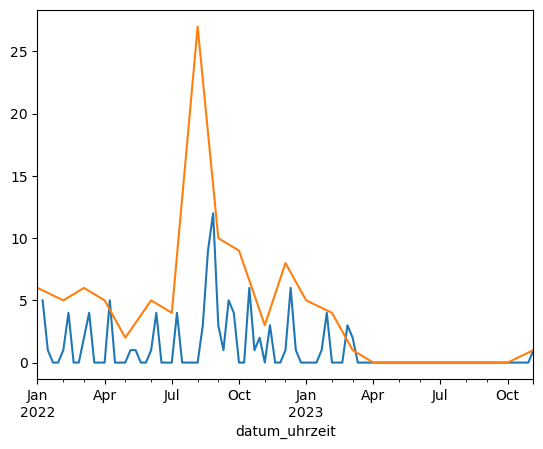

In [11]:
#df_items_sold_weekly.set_index('datum_uhrzeit',inplace=True)
#df_items_sold_weekly.index=pd.to_datetime(df_items_sold.index)
#drop null values
#df_items_sold_weekly.dropna(inplace=True)
ser_items_sold_weekly.plot()
ser_items_sold_monthly.plot()

In [12]:
result=seasonal_decompose(df_items_sold_monthly['menge'], model='additive', period=12)
result.seasonal.plot()

ValueError: x must have 2 complete cycles requires 24 observations. x only has 23 observation(s)

### by product

In [ ]:
input_produkt =  'Green Hero Schweif- und Mähnenpflege'

produkt_df = df_2017_23[['datum_uhrzeit', 'stock_keeping_unit', 'produkt', 'menge']][df_2017_23.produkt == input_produkt]

In [ ]:
ser_items_sold_weekly = produkt_df.groupby([pd.Grouper(key='datum_uhrzeit', freq='W')])['menge'].sum()
df_items_sold_weekly = ser_items_sold_weekly.reset_index()
df_items_sold_weekly.set_index('datum_uhrzeit',inplace=True)
df_items_sold_weekly.index=pd.to_datetime(df_items_sold_weekly.index)
df_items_sold_weekly

ser_items_sold_monthly = produkt_df.groupby([pd.Grouper(key='datum_uhrzeit', freq='M')])['menge'].sum()
df_items_sold_monthly = ser_items_sold_monthly.reset_index()
df_items_sold_monthly.set_index('datum_uhrzeit',inplace=True)
df_items_sold_monthly.index=pd.to_datetime(df_items_sold_monthly.index)
df_items_sold_monthly

,menge
datum_uhrzeit,
2018-05-31 00:00:00+00:00,1.0
2018-06-30 00:00:00+00:00,0.0
2018-07-31 00:00:00+00:00,0.0
2018-08-31 00:00:00+00:00,0.0
2018-09-30 00:00:00+00:00,0.0
...,...
2023-08-31 00:00:00+00:00,0.0
2023-09-30 00:00:00+00:00,1.0
2023-10-31 00:00:00+00:00,3.0


<AxesSubplot: xlabel='datum_uhrzeit'>

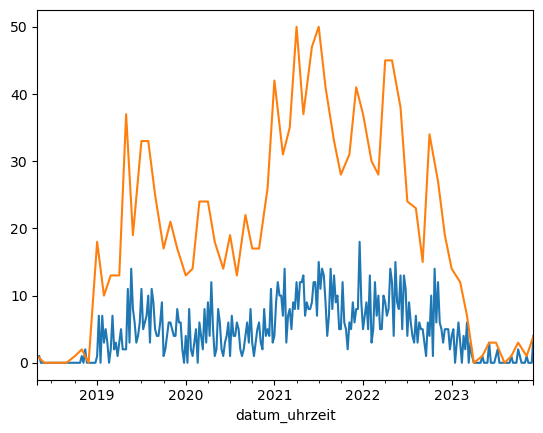

In [ ]:
#df_items_sold_weekly.set_index('datum_uhrzeit',inplace=True)
#df_items_sold_weekly.index=pd.to_datetime(df_items_sold.index)
#drop null values
#df_items_sold_weekly.dropna(inplace=True)
ser_items_sold_weekly.plot()
ser_items_sold_monthly.plot()

<AxesSubplot: xlabel='datum_uhrzeit'>

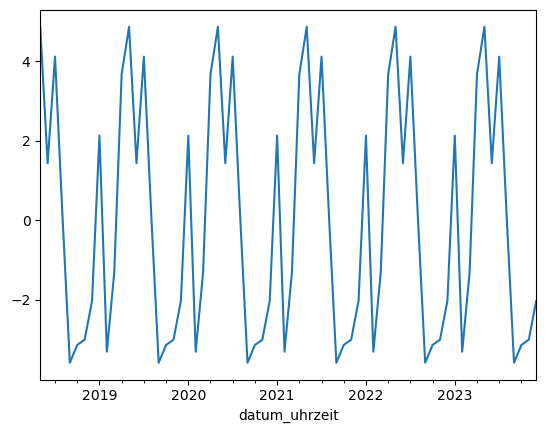

In [ ]:
result=seasonal_decompose(df_items_sold_monthly['menge'], model='additive', period=12)
result.seasonal.plot()